In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Datasets/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.isnull().sum().sum()

0

#Replacing blanks with 0 as tenure is 0 and no total of total charges are recorded as blank

In [6]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

0

In [10]:
df["customerID"].duplicated().sum()

0

In [11]:
df1=df.copy()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Converting the Value 0 to No and 1 to YES in senior Citizer

In [13]:
df1["SeniorCitizen"]=df1["SeniorCitizen"].map({0:'NO',1:'YES'})
df1.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,NO,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,NO,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,NO,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,NO,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,NO,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
df=df1.copy()
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,NO,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,NO,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,NO,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,NO,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,NO,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#Counting the number of customers Churned out(Yes) and customers who remained(No) and visualizing with the help of countplot

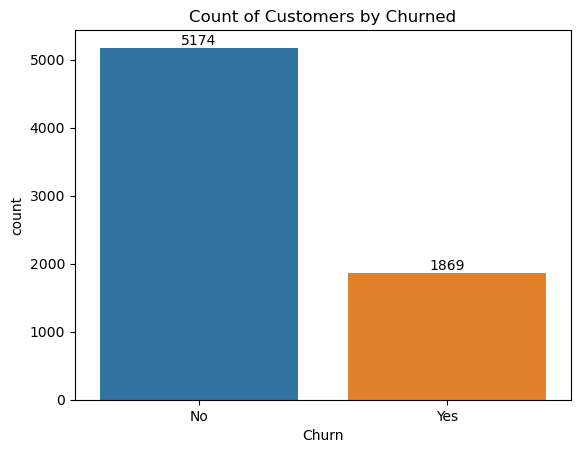

In [15]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churned")
plt.show()

Using pie Chart to visualize the Churned customers and Remained Customers

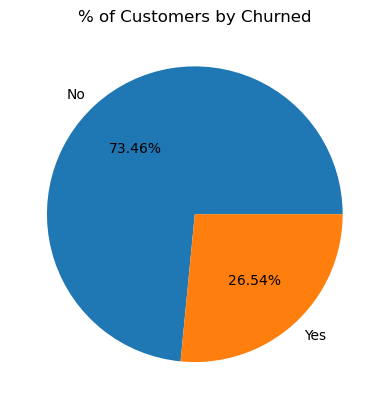

In [16]:
group_by=df.groupby('Churn').agg({'Churn' : "count"})
plt.pie(group_by['Churn'],labels=group_by.index,autopct="%1.2f%%")
plt.title("% of Customers by Churned")
plt.show()

From the given Pie-Chart we can conclude that 26.54% of the Customers have churned-out and 73.46% of the customers have remained 

Identifying the Reason behind the churning , i.e first we will try to identify based on gender like how many customers who Churned are from which gender

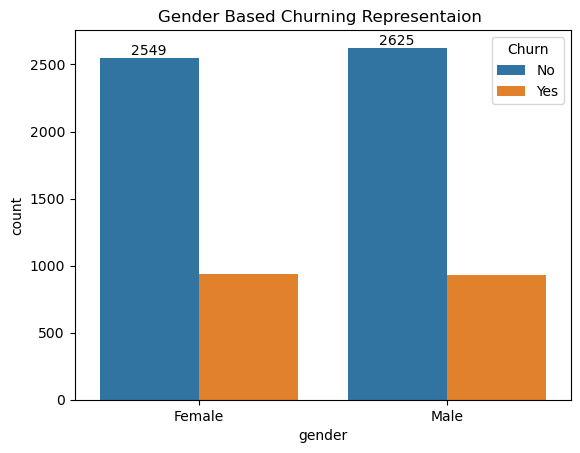

<Figure size 300x300 with 0 Axes>

In [17]:
import seaborn as sns
df=df.copy()
ax=sns.countplot(x='gender',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Gender Based Churning Representaion ")
plt.figure(figsize=(3,3))
plt.show()

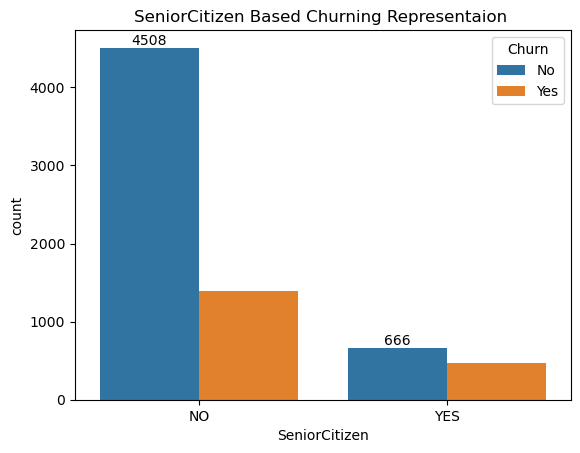

<Figure size 300x300 with 0 Axes>

In [18]:
ax=sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("SeniorCitizen Based Churning Representaion ")
plt.figure(figsize=(3,3))
plt.show()

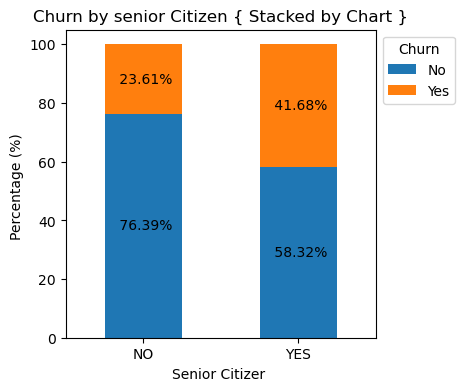

In [30]:
total_counts=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
fig, ax = plt.subplots(figsize=(4,4))
total_counts.plot(kind='bar',stacked=True,ax=ax,color=['#1f77b4','#ff7f0e'])

for p in ax.patches :
    width,height = p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.text(x+width / 2,y + height / 2,f'{height : 2.2f}%' ,ha='center',va='center')

plt.title('Churn by senior Citizen { Stacked by Chart }');
plt.xlabel("Senior Citizer ")
plt.ylabel("Percentage (%) ")
plt.xticks(rotation=0)
plt.legend(title='Churn',bbox_to_anchor=(1.0,1.0))
plt.show()


Here yes represents the Senior Citizer and where as No represents the none senior Citizen..........                                             . . . Comparitively a greater number pf people in Senior Citizen have Churned out 

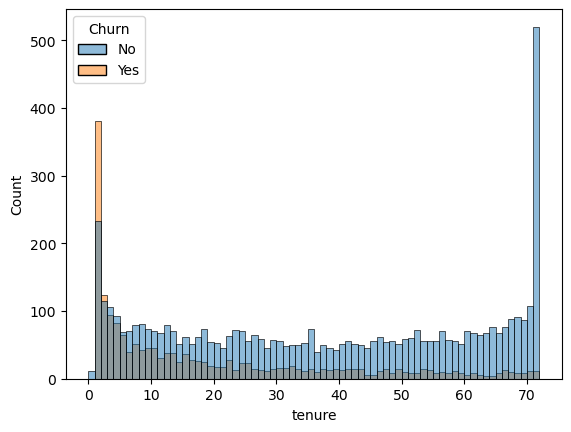

<Figure size 900x400 with 0 Axes>

In [37]:
import warnings
warnings.filterwarnings('ignore')
sns.histplot(x='tenure',data=df, hue='Churn',bins=72)
plt.figure(figsize=(9,4))
plt.show()

Customers that used our services for fewer month ie...1 month have higher rate of Churned 
where as Comparatively lesser Churned rate towards the customer who has used our servies for larger period

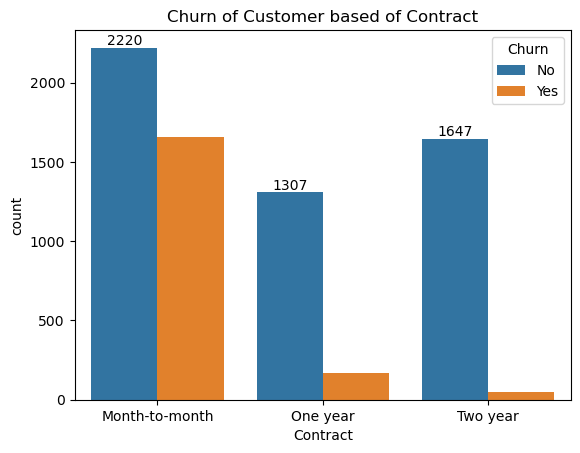

<Figure size 400x400 with 0 Axes>

In [45]:
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churn of Customer based of Contract")
plt.figure(figsize=(4,4))
plt.show()

It is seen as the customers who have Contracted with "Month - to - Month" have higher rate of Churning out than the customers who have "One year " or "Two Year"

In [50]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

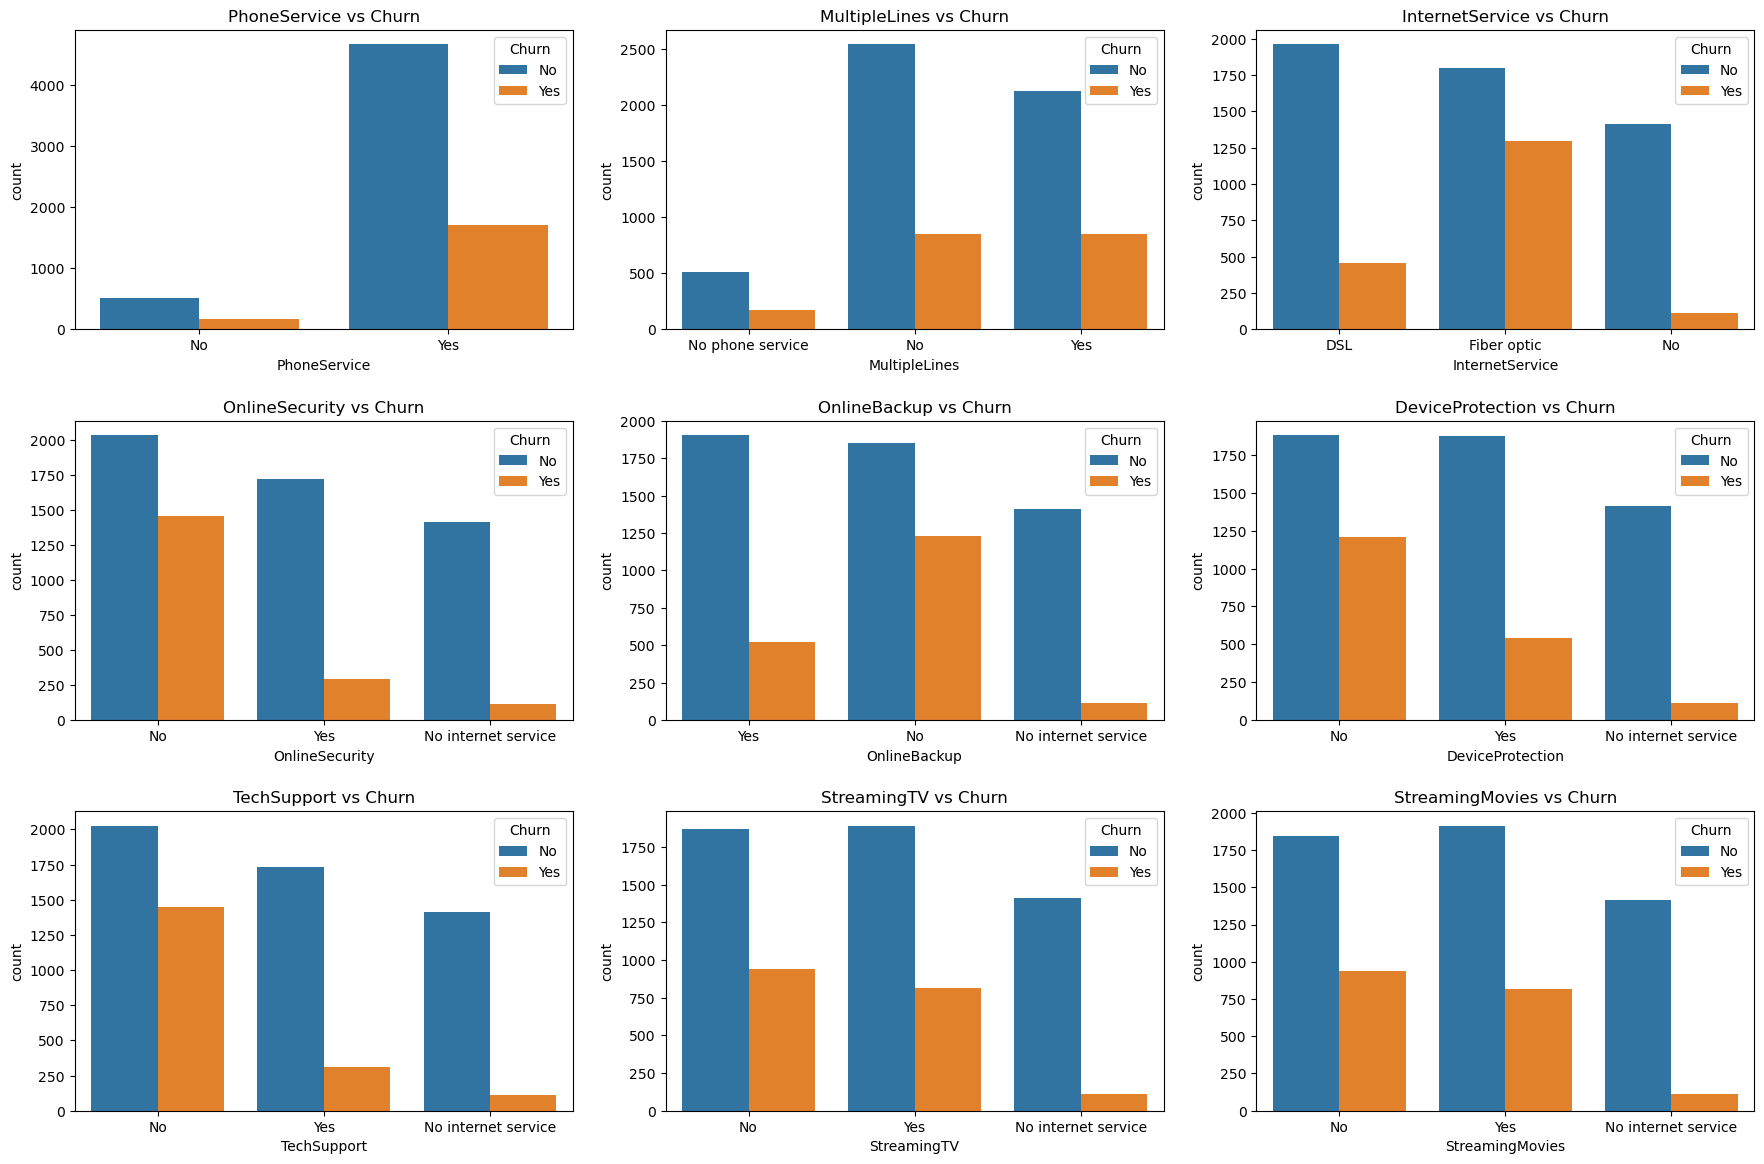

In [55]:
# List of service-related columns
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D axes array to 1D for easy indexing

# Plot each column
for i, col in enumerate(service_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn', fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=0)  # Set label rotation to 0
    for label in axes[i].get_xticklabels():
        label.set_ha('center')  # Center align each label

# Improve spacing
plt.tight_layout(pad=2.0)
plt.show()


The majority of customers who did not churned out have tend to the services like PhoneService,InternetService and OnlineSecurity enabled.For sevices like OnlineBackup , TechSupport and Streaming Movies have higher Churned Rate

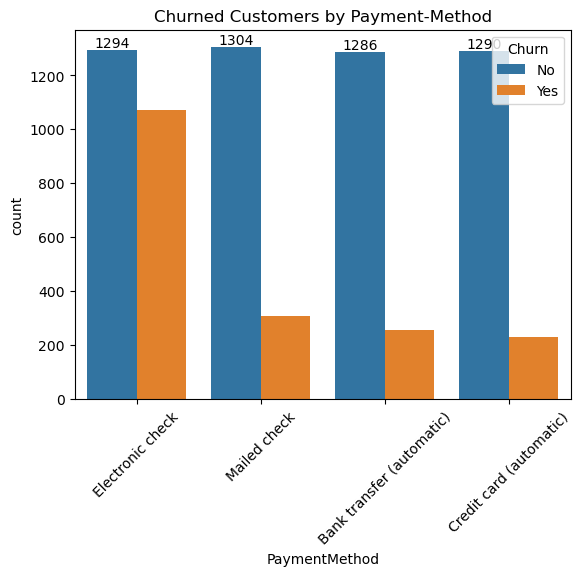

<Figure size 600x400 with 0 Axes>

In [61]:
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by Payment-Method")
plt.xticks(rotation=45)
plt.figure(figsize=(6,4))
plt.show()

It is seen that the customers who have used Electronic Check method as a payment have higher rate of Churn

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64